In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio
import sys, os, glob, time, warnings, gc
import healpy as hp

from scipy.ndimage.filters import convolve

In [2]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [4]:
gaussian = lambda x, y, a, sigma: a*np.exp(-(x**2+y**2)/(2*sigma**2))
devauc = lambda x, y, a, r_half: a*np.exp(-7.669*((np.sqrt(x**2+y**2)/r_half)**(1/4))-1)

In [5]:
x = np.linspace(-100, 100, 201)
y = np.linspace(-100, 100, 201)
xx, yy = np.meshgrid(x, y)

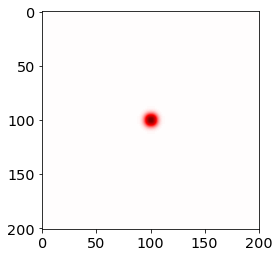

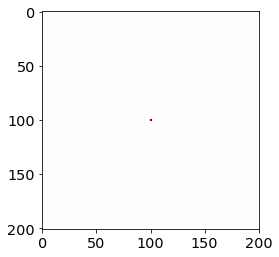

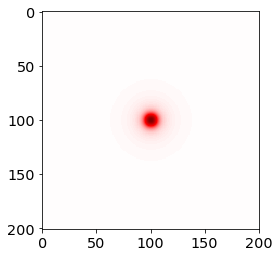

In [17]:
ag, sigma = 1., 4.
ad, r_half = 1., 20.

gg = gaussian(xx, yy, ag, sigma)
dd = devauc(xx, yy, ad, r_half)
ii = convolve(dd, gg/np.sum(gg), mode='constant')

plt.imshow(gg, vmin=-1, vmax=1, cmap='seismic')
plt.show()
plt.imshow(dd, vmin=-dd.max(), vmax=dd.max(), cmap='seismic')
plt.show()
plt.imshow(ii, vmin=-ii.max(), vmax=ii.max(), cmap='seismic')
plt.show()

-----
## NEA

In [18]:
print(np.sum(ii)**2/np.sum(ii**2)) # single pixel area is 1

p = 1.15
print(((4 * np.pi * sigma**2)**(1/p) + (9.12 * r_half**2)**(1/p))**p)

1129.906971538695
3987.4408411622167


__David's formula works!__

-----
## NEA of elongated exponential

In [172]:
elongexp = lambda x, y, a, b, q: a*np.exp(-(1/b)*np.sqrt(x**2+(y*q)**2))

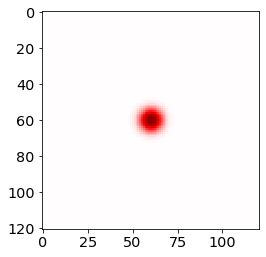

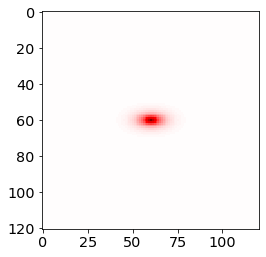

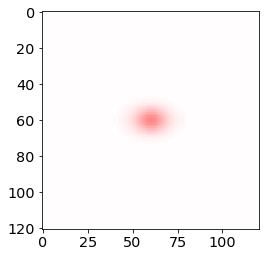

In [186]:
ael, bel, qel = 1., 4., 2.
ee = elongexp(xx, yy, ael, bel, qel)

ii = convolve(ee, gg/np.sum(gg), mode='constant')

plt.imshow(gg, vmin=-1, vmax=1, cmap='seismic')
plt.show()
plt.imshow(ee, vmin=-1, vmax=1, cmap='seismic')
plt.show()
plt.imshow(ii, vmin=-1, vmax=1, cmap='seismic')
plt.show()

In [187]:
print(np.sum(ii)**2/np.sum(ii**2)) # single pixel area is 1

r_half = 1.67835 * bel / qel
p = 1.15
print(((4 * np.pi * sigma**2)**(1/p) + qel * (9.12 * (r_half)**2)**(1/p))**p)

475.69601556282595
475.99172939979


__Check a few different aspect ratios__

In [188]:
ael, bel, qel = 1., 4., 1.
ee = elongexp(xx, yy, ael, bel, qel)

ii = convolve(ee, gg/np.sum(gg), mode='constant')

print(np.sum(ii)**2/np.sum(ii**2)) # single pixel area is 1
r_half = 1.67835 * bel / qel
p = 1.15
print(((4 * np.pi * sigma**2)**(1/p) + qel * (9.12 * (r_half)**2)**(1/p))**p)

673.8277860457424
673.8258737599283


In [195]:
ael, bel, qel = 1., 4., 1.5
ee = elongexp(xx, yy, ael, bel, qel)

ii = convolve(ee, gg/np.sum(gg), mode='constant')

print(np.sum(ii)**2/np.sum(ii**2)) # single pixel area is 1
r_half = 1.67835 * bel / qel
p = 1.15
print(((4 * np.pi * sigma**2)**(1/p) + qel * (9.12 * (r_half)**2)**(1/p))**p)

536.2274851214711
545.0044236154681


In [189]:
ael, bel, qel = 1., 4., 3.
ee = elongexp(xx, yy, ael, bel, qel)

ii = convolve(ee, gg/np.sum(gg), mode='constant')

print(np.sum(ii)**2/np.sum(ii**2)) # single pixel area is 1
r_half = 1.67835 * bel / qel
p = 1.15
print(((4 * np.pi * sigma**2)**(1/p) + qel * (9.12 * (r_half)**2)**(1/p))**p)

424.1261131767583
402.0391636409179
